In [1]:
import numpy as np
import scipy.stats as sts
import requests

In [2]:
income = np.loadtxt('data/incomes.txt')

/Users/haihaoguo/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Percent of incomes')

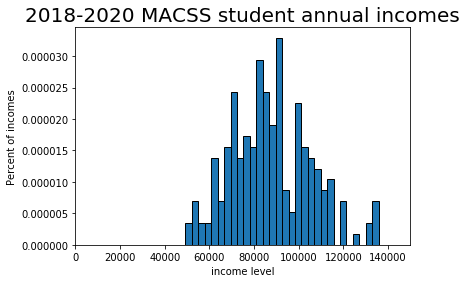

In [9]:
import matplotlib.pyplot as plt


num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, edgecolor='k', normed=True)
plt.title('2018-2020 MACSS student annual incomes', fontsize=20)
plt.xlim([0, 150000])
plt.xlabel(r'income level')
plt.ylabel('Percent of incomes')

Log-likelihood:  -2385.856997808558


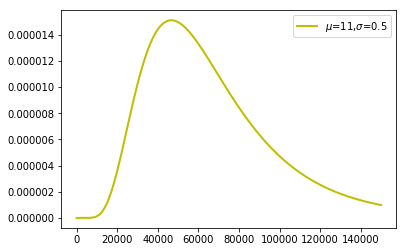

In [10]:
def log_normal_pdf(xvals, mu, sigma):
    return sts.lognorm.pdf(xvals, scale=np.exp(mu), s=sigma)

def log_lik_norm(xvals, mu, sigma):
    
    pdf_vals = sts.lognorm.pdf(xvals, scale=np.exp(mu), s=sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

mu = 11
sigma = 0.5
xval = np.linspace(1e-9, 150000, 200000)

plt.plot(xval, log_normal_pdf(xval, mu, sigma),
         linewidth=2, color='y', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper right')

print('Log-likelihood: ', log_lik_norm(income, mu, sigma))

In [6]:
def crit(params, *args):

    mu, sigma = params
    xvals = args
    log_lik_val = log_lik_norm(xvals, mu, abs(sigma))
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [7]:
import scipy.optimize as opt

mu_init = 11  # mu_2
sig_init = 0.5  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = income
results_uncstr = opt.minimize(crit, params_init, args=mle_args)
mu_MLE, sig_MLE = results_uncstr.x
Hess = results_uncstr.hess_inv
fval = -results_uncstr.fun

print('the ML estimates for μ and σ is {:.2f} and {:.2f}'.format(mu_MLE, sig_MLE))
print('The value of the likelihood function is ', fval)
print('The variance-covariance matrix is\n ', Hess)

the ML estimates for μ and σ is 11.36 and 0.21
The value of the likelihood function is  -2241.7193013573587
The variance-covariance matrix is
  [[1.12331589e-04 5.23389235e-05]
 [5.23389235e-05 1.81933048e-04]]


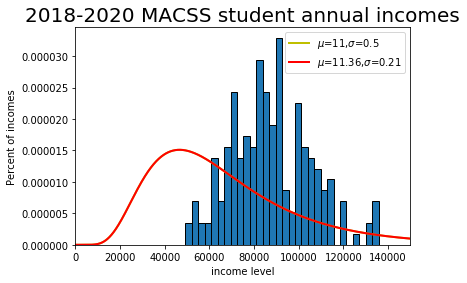

In [8]:
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, edgecolor='k', density=True)
plt.title('2018-2020 MACSS student annual incomes', fontsize=20)
plt.xlim([0, 150000])
plt.xlabel(r'income level')
plt.ylabel('Percent of incomes')

mu = 11
sigma = 0.5
xval = np.linspace(1e-9, 150000, 200000)
plt.plot(xval, log_normal_pdf(xval, mu, sigma),
         linewidth=2, color='y', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper right')

mu_ = 11.36
sigma_ = 0.21
plt.plot(xval, log_normal_pdf(xval, mu, sigma),
         linewidth=2, color='r', label='$\mu$=11.36,$\sigma$=0.21')
plt.legend(loc='upper right')